In [1]:
# Parameters. Set defaults here.
# Times Square replaces this cell with the user's parameters.
env = 'usdf_dev'  # usdf-dev, tucson, slac, summit
log_name = 'narrativelog'
record_limit = '999'

In [2]:
# Only use packages available in the Rubin Science Platform
import requests
from collections import defaultdict
import pandas as pd
from pprint import pp
from urllib.parse import urlencode
from IPython.display import FileLink
from matplotlib import pyplot as plt

In [3]:
log = log_name
limit = int(record_limit)
response_timeout = 3.05  # seconds, how long to wait for connection
read_timeout = 20  # seconds

timeout = (float(response_timeout), float(read_timeout))

# Env list comes from drop-down menu top of:
# https://rsp.lsst.io/v/usdfdev/guides/times-square/
envs = dict(
    #rubin_usdf_dev = '',
    #data_lsst_cloud = '',
    #usdf = '',
    #base_data_facility = '',
    summit = 'https://summit-lsp.lsst.codes',
    usdf_dev = 'https://usdf-rsp-dev.slac.stanford.edu',
    #rubin_idf_int = '',
    tucson = 'https://tucson-teststand.lsst.codes',
)
server = envs[env]
server

'https://usdf-rsp-dev.slac.stanford.edu'

In [4]:
recs = None
ok = True

# is_human=either&is_valid=either&offset=0&limit=50' 
# site_ids=tucson&message_text=wubba&min_level=0&max_level=999&user_ids=spothier&user_agents=LOVE
# tags=love&exclude_tags=ignore_message
qparams = dict(is_human='either',
               is_valid='either',
               limit=limit,
              )
qstr = urlencode(qparams)
url = f'{server}/{log}/messages?{qstr}'
print(f'\nAttempt to get logs from {url=}')
ignore_fields = set(['tags', 'urls', 'message_text', 'id', 'date_added', 
                     'obs_id', 'day_obs', 'seq_num', 'parent_id', 'user_id',
                     'date_invalidated', 'date_begin', 'date_end',
                     'time_lost', # float
                     #'systems','subsystems','cscs',  # values are lists, special handling
                    ])
try:
    response = requests.get(url, timeout=timeout)
    response.raise_for_status()
    recs = response.json()
    flds = set(recs[0].keys())
    facflds = flds - ignore_fields
    # facets(field) = set(value-1, value-2, ...)
    facets = {fld: set([str(r[fld])
                for r in recs if not isinstance(r[fld], list)]) 
                    for fld in facflds}
except Exception as err:
    ok = False
    print(f'ERROR getting {log} from {env=} using {url=}: {err=}')
numf = len(flds) if ok else 0
numr = len(recs) if ok else 0
print(f'{numr=} {numf=}')


Attempt to get logs from url='https://usdf-rsp-dev.slac.stanford.edu/narrativelog/messages?is_human=either&is_valid=either&limit=999'
numr=999 numf=24


In [5]:
flds

{'category',
 'components',
 'cscs',
 'date_added',
 'date_begin',
 'date_end',
 'date_invalidated',
 'id',
 'is_human',
 'is_valid',
 'level',
 'message_text',
 'parent_id',
 'primary_hardware_components',
 'primary_software_components',
 'site_id',
 'subsystems',
 'systems',
 'tags',
 'time_lost',
 'time_lost_type',
 'urls',
 'user_agent',
 'user_id'}

In [6]:
facets

{'level': {'0', '100'},
 'category': {'None', 'SCIENCE'},
 'subsystems': {'None'},
 'user_agent': {'LOVE'},
 'primary_software_components': {'None'},
 'is_valid': {'False', 'True'},
 'is_human': {'True'},
 'systems': {'None'},
 'primary_hardware_components': {'None'},
 'cscs': {'None'},
 'components': {'None'},
 'site_id': {'summit'},
 'time_lost_type': {'None', 'fault'}}

In [7]:
recs[0]

{'id': '0005d0e0-6de7-4857-b658-cfca7147374a',
 'site_id': 'summit',
 'message_text': 'The moveShutterMainDoor command Fail\r\n\r\n\r\nwe try the parameter with uppercase now\r\n\r\n\r\n open: False\r\n\r\n\r\n\r\n\r\nError in run\r\nTraceback (most recent call last):\r\n  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-8.0.0/lib/python3.11/asyncio/tasks.py", line 500, in wait_for\r\n    return fut.result()\r\n           ^^^^^^^^^^^^\r\n  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/lsst/ts/salobj/topics/remote_command.py", line 239, in _get_next_ackcmd\r\n    await self._next_ack_event.wait()\r\n  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-8.0.0/lib/python3.11/asyncio/locks.py", line 213, in wait\r\n    await fut\r\nasyncio.exceptions.CancelledError\r\n\r\n\r\nThe above exception was the direct cause of the following exception:\r\n\r\n\r\nTraceback (most recent call last):\r\n  File "/opt/lsst/software/stack/conda/envs/ls

In [8]:
cols = ['date_added', 'time_lost']
df = pd.DataFrame(recs)[cols]
df

,date_added,time_lost
0,2024-03-20T04:16:06.976595,0.0
1,2024-04-24T20:54:19.346646,0.0
2,2024-06-19T01:59:58.701343,0.0
3,2024-08-21T04:22:26.232653,0.0
4,2023-11-21T19:55:36.787105,0.0
...,...,...
994,2023-11-16T02:57:08.886132,0.0
995,2024-04-19T23:27:40.232791,0.0
996,2024-01-05T20:16:07.172173,0.0
997,2024-07-15T19:40:15.707753,0.0


In [9]:
# Allow download of CSV version of DataFrame
csvfile = 'tl.csv'
df.to_csv(csvfile)
myfile = FileLink(csvfile)
display(myfile)

/home/pothiers/sandbox/ts_notebooks/logging/tl.csv

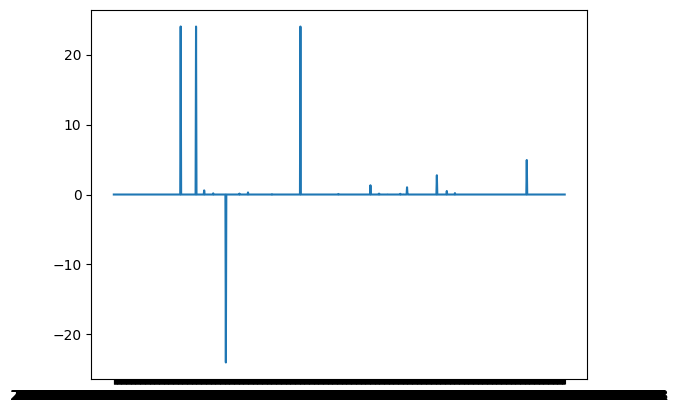

In [10]:
x = [r['date_added'] for r in recs]
y = [r['time_lost'] for r in recs]
plt.plot(x, y) 
plt.show()

In [11]:
recs[:4]

[{'id': '0005d0e0-6de7-4857-b658-cfca7147374a',
  'site_id': 'summit',
  'message_text': 'The moveShutterMainDoor command Fail\r\n\r\n\r\nwe try the parameter with uppercase now\r\n\r\n\r\n open: False\r\n\r\n\r\n\r\n\r\nError in run\r\nTraceback (most recent call last):\r\n  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-8.0.0/lib/python3.11/asyncio/tasks.py", line 500, in wait_for\r\n    return fut.result()\r\n           ^^^^^^^^^^^^\r\n  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/lsst/ts/salobj/topics/remote_command.py", line 239, in _get_next_ackcmd\r\n    await self._next_ack_event.wait()\r\n  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-8.0.0/lib/python3.11/asyncio/locks.py", line 213, in wait\r\n    await fut\r\nasyncio.exceptions.CancelledError\r\n\r\n\r\nThe above exception was the direct cause of the following exception:\r\n\r\n\r\nTraceback (most recent call last):\r\n  File "/opt/lsst/software/stack/conda/envs

In [12]:
df = pd.DataFrame(recs)
df

,id,site_id,message_text,level,tags,urls,time_lost,date_begin,user_id,user_agent,...,parent_id,systems,subsystems,cscs,date_end,components,primary_software_components,primary_hardware_components,category,time_lost_type
0,0005d0e0-6de7-4857-b658-cfca7147374a,summit,The moveShutterMainDoor command Fail\r\n\r\n\r...,0,[],[],0.0,2024-03-20T04:15:26.769000,cmorales@summit-lsp.lsst.codes,LOVE,...,None,None,None,None,2024-03-20T04:15:26.769000,[AuxTel],[None],[None],None,fault
1,00067b6a-1741-41f3-87af-57261dff30ac,summit,David updated environment. But no need to cycl...,0,[],[],0.0,2024-04-24T20:53:41.843000,ykang@summit-lsp.lsst.codes,LOVE,...,None,None,None,None,2024-04-24T20:53:41.843000,[MainTel],[None],[None],None,fault
2,000a3ba8-b1a9-4b04-9c4a-263da3dac1d1,summit,"Runing BLOCK-T22 AuxTel filter Scans, the auxt...",0,[],[],0.0,2024-06-19T01:59:08.706000,cmd_user@summit-lsp.lsst.codes,LOVE,...,af0157e3-d7f0-4068-9a8a-e51a0a77d260,None,None,None,2024-06-19T01:59:08.706000,[AuxTel],[None],[None],None,fault
3,0010e246-8039-4741-b4c6-54047e9464c5,summit,Still checking updates in the wavefront estima...,0,[],[],0.0,2024-08-21T04:04:38.053000,kpena@summit-lsp.lsst.codes,LOVE,...,99de2a12-20eb-45ae-b189-a793b63e6ab5,None,None,None,2024-08-21T04:04:38.053000,[AuxTel],[None],[None],None,fault
4,0017b90e-26aa-4a7c-8186-fc06ac9b5aa6,summit,The m1m3 ump test failed for actuator 108. \r\...,0,[],[],0.0,2023-11-21T19:51:54.868000,bquint@love01.cp.lsst.org,LOVE,...,None,None,None,None,2023-11-21T19:51:54.868000,[MainTel],[None],[None],None,fault
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,22325b7d-7948-4da8-88ec-2a47ceb088e0,summit,Block 109 starting again\r\n,0,[],[],0.0,2023-11-16T02:56:30.009000,echristensen@love01.cp.lsst.org,LOVE,...,None,None,None,None,2023-11-16T02:56:30.009000,[MainTel],[None],[None],None,fault
995,2233da67-c777-4dd6-bc66-a241f93df5ae,summit,Az encoder checking thru slew test. \r\n\r\n\r...,0,[],[],0.0,2024-04-19T23:27:02.011000,ykang@summit-lsp.lsst.codes,LOVE,...,None,None,None,None,2024-04-19T23:27:02.011000,[MainTel],[None],[None],None,fault
996,223c0310-03d5-450d-bf5c-0a04bdea6536,summit,Restarting [BLOCK-178|https://jira.lsstcorp.or...,0,[],[],0.0,2024-01-05T20:15:27.453000,kfanning@love01.cp.lsst.org,LOVE,...,None,None,None,None,2024-01-05T20:15:27.453000,[MainTel],[None],[None],None,fault
997,2240e19e-7204-4c50-a3ba-c643d60aa0d2,summit,LATISS enabled but checkout failed \r\n\r\n\r\...,0,[],[],0.0,2024-07-15T19:39:38.630000,kkelkar@summit-lsp.lsst.codes,LOVE,...,None,None,None,None,2024-07-15T19:39:38.630000,[AuxTel],[None],[None],None,fault
